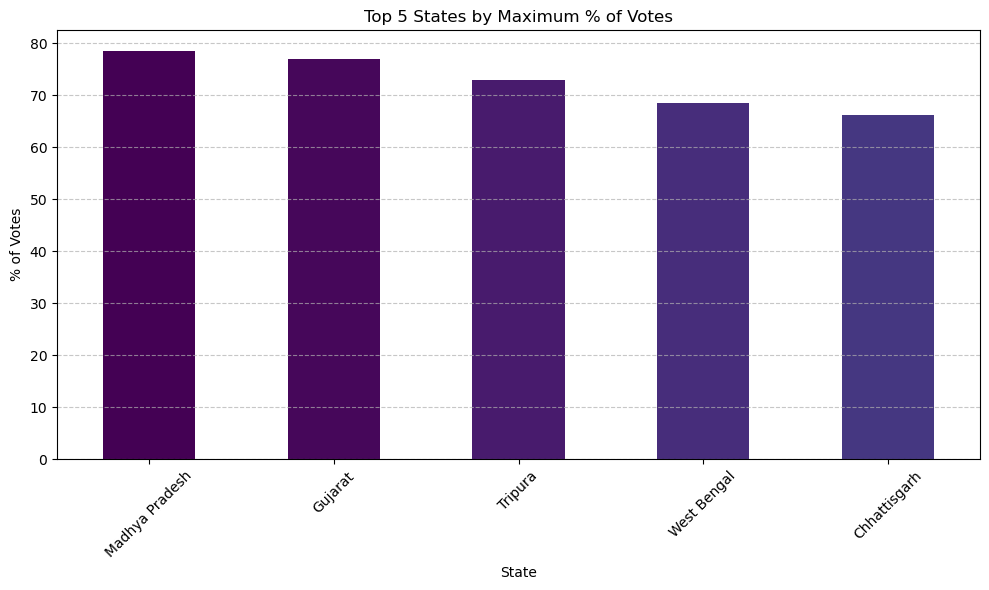

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Replace '-' with NaN in '% of Votes' column
df['% of Votes'] = pd.to_numeric(df['% of Votes'].str.replace('%', ''), errors='coerce')

# Find the maximum % of votes for each state
max_votes_by_state = df.groupby('state')['% of Votes'].max().sort_values(ascending=False)

# Get the top 5 states
top_5_states = max_votes_by_state.head(5)

# Define colors for each bar
colors = plt.cm.viridis_r(top_5_states.values / float(max_votes_by_state.max()))

# Plotting
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color=colors)
plt.title('Top 5 States by Maximum % of Votes')
plt.xlabel('State')
plt.ylabel('% of Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


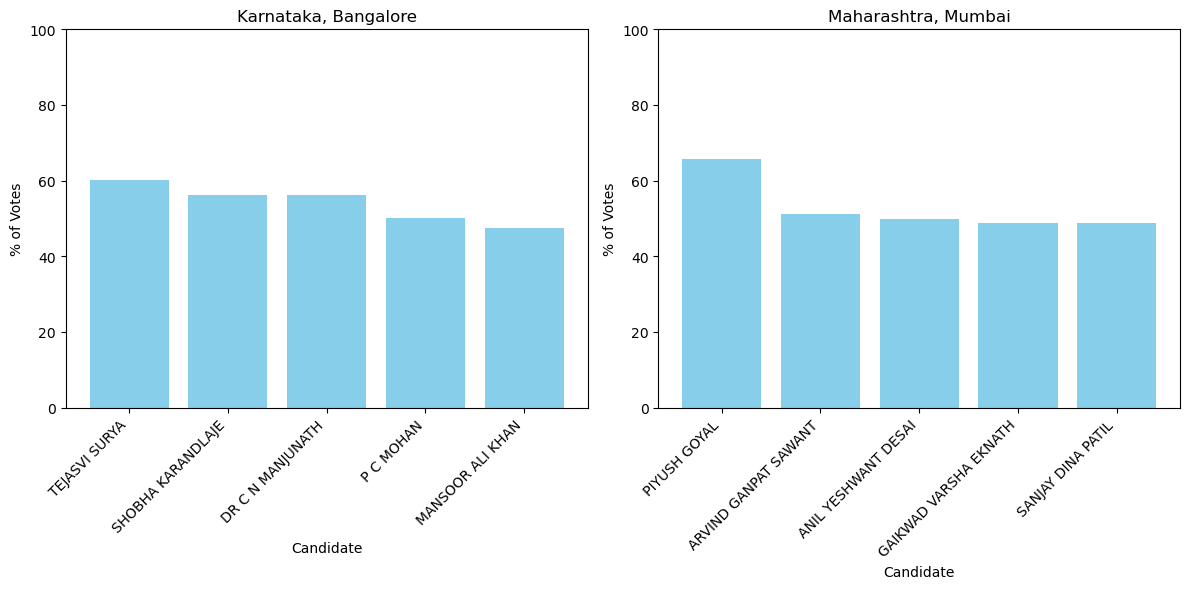

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Clean the % of Votes column by replacing non-numeric values with NaN
df['% of Votes'] = pd.to_numeric(df['% of Votes'].str.replace('%', ''), errors='coerce')

# Calculate total votes for each constituency
df['Total Votes'] = pd.to_numeric(df['Total Votes'].str.replace(',', ''), errors='coerce')

# Get the top 2 constituencies by total votes
top_2_constituencies = df.groupby(['state', 'constituency_name'])['Total Votes'].sum().nlargest(2).reset_index()

# Merge to get the candidate details for the top 2 constituencies
top_2_details = pd.merge(df, top_2_constituencies, on=['state', 'constituency_name'])

# Function to plot voting patterns for a constituency
def plot_voting_pattern(constituency, title):
    top_5_candidates = constituency.nlargest(5, '% of Votes')
    plt.bar(top_5_candidates['Candidate'], top_5_candidates['% of Votes'], color='skyblue')
    plt.title(title)
    plt.xlabel('Candidate')
    plt.ylabel('% of Votes')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.tight_layout()

# Plotting
plt.figure(figsize=(12, 6))

for i, ((state, constituency_name), constituency) in enumerate(top_2_details.groupby(['state', 'constituency_name'])):
    plt.subplot(1, 2, i + 1)
    plot_voting_pattern(constituency, f"{state}, {constituency_name}")

plt.tight_layout()
plt.show()


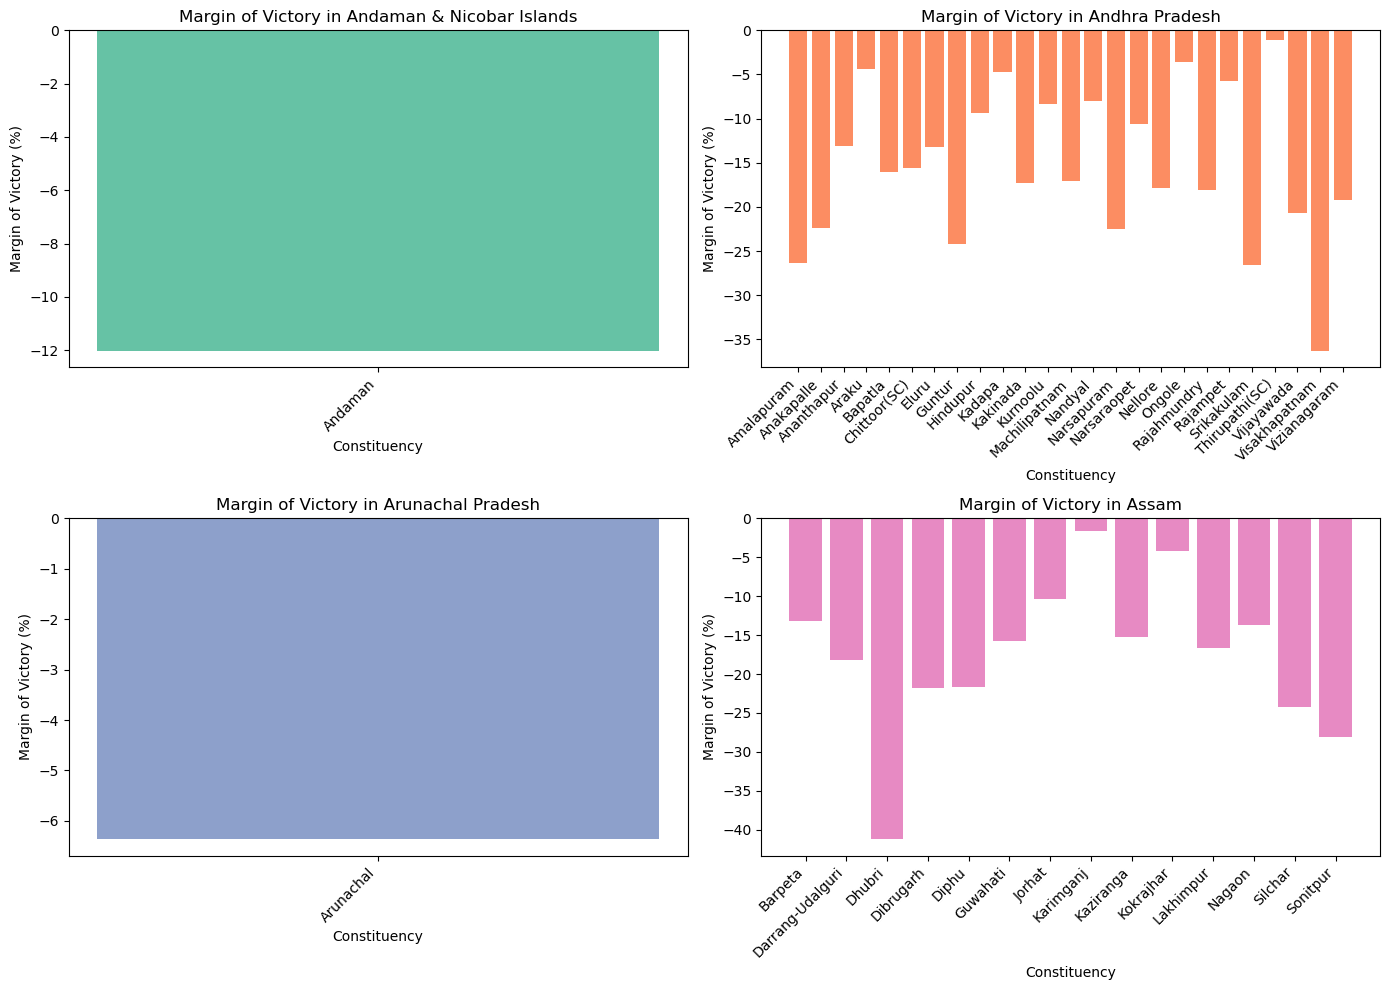

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Clean the % of Votes column by replacing non-numeric values with NaN
df['% of Votes'] = pd.to_numeric(df['% of Votes'].str.replace('%', ''), errors='coerce')

# Calculate the margin of victory
df = df.sort_values(by=['state', 'constituency_name', '% of Votes'], ascending=[True, True, False])
df['Rank'] = df.groupby(['state', 'constituency_name'])['% of Votes'].rank(ascending=False, method='first')
df['Margin of Victory'] = df.groupby(['state', 'constituency_name'])['% of Votes'].diff().shift(-1)

# Get the winners' details
winners = df[df['Rank'] == 1]

# Select 4 states
selected_states = winners['state'].unique()[:4]

# Define colors for each subplot
colors = plt.cm.Set2.colors

# Plotting
plt.figure(figsize=(14, 10))

for i, (state, state_data) in enumerate(filtered_data.groupby('state')):
    plt.subplot(2, 2, i + 1)
    plt.bar(state_data['constituency_name'], state_data['Margin of Victory'], color=colors[i])
    plt.title(f"Margin of Victory in {state}")
    plt.xlabel('Constituency')
    plt.ylabel('Margin of Victory (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.tight_layout()
plt.show()


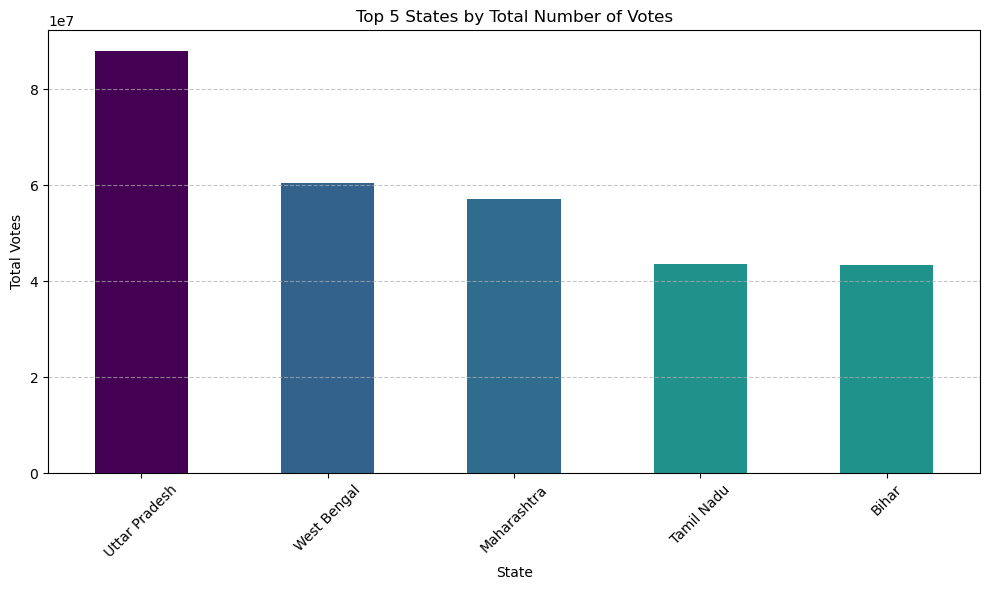

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Clean the Total Votes column by replacing non-numeric values with NaN
df['Total Votes'] = pd.to_numeric(df['Total Votes'].str.replace(',', ''), errors='coerce')

# Calculate the total number of votes for each state
total_votes_by_state = df.groupby('state')['Total Votes'].sum().sort_values(ascending=False)

# Get the top 5 states with the most number of votes
top_5_states = total_votes_by_state.head(5)

# Define colors for each bar
colors = plt.cm.viridis_r(top_5_states.values / float(total_votes_by_state.max()))

# Plotting
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color=colors)
plt.title('Top 5 States by Total Number of Votes')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


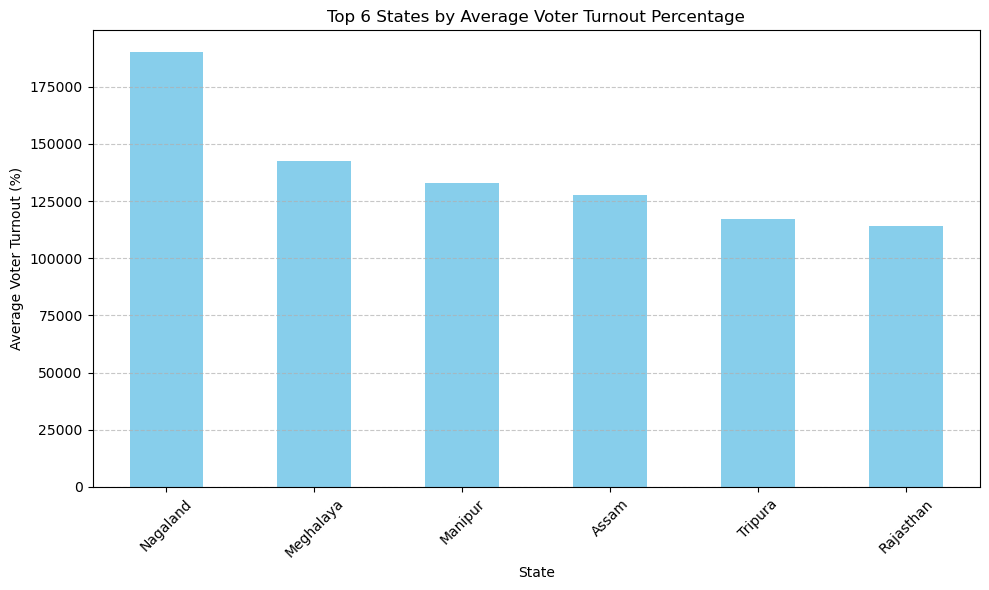

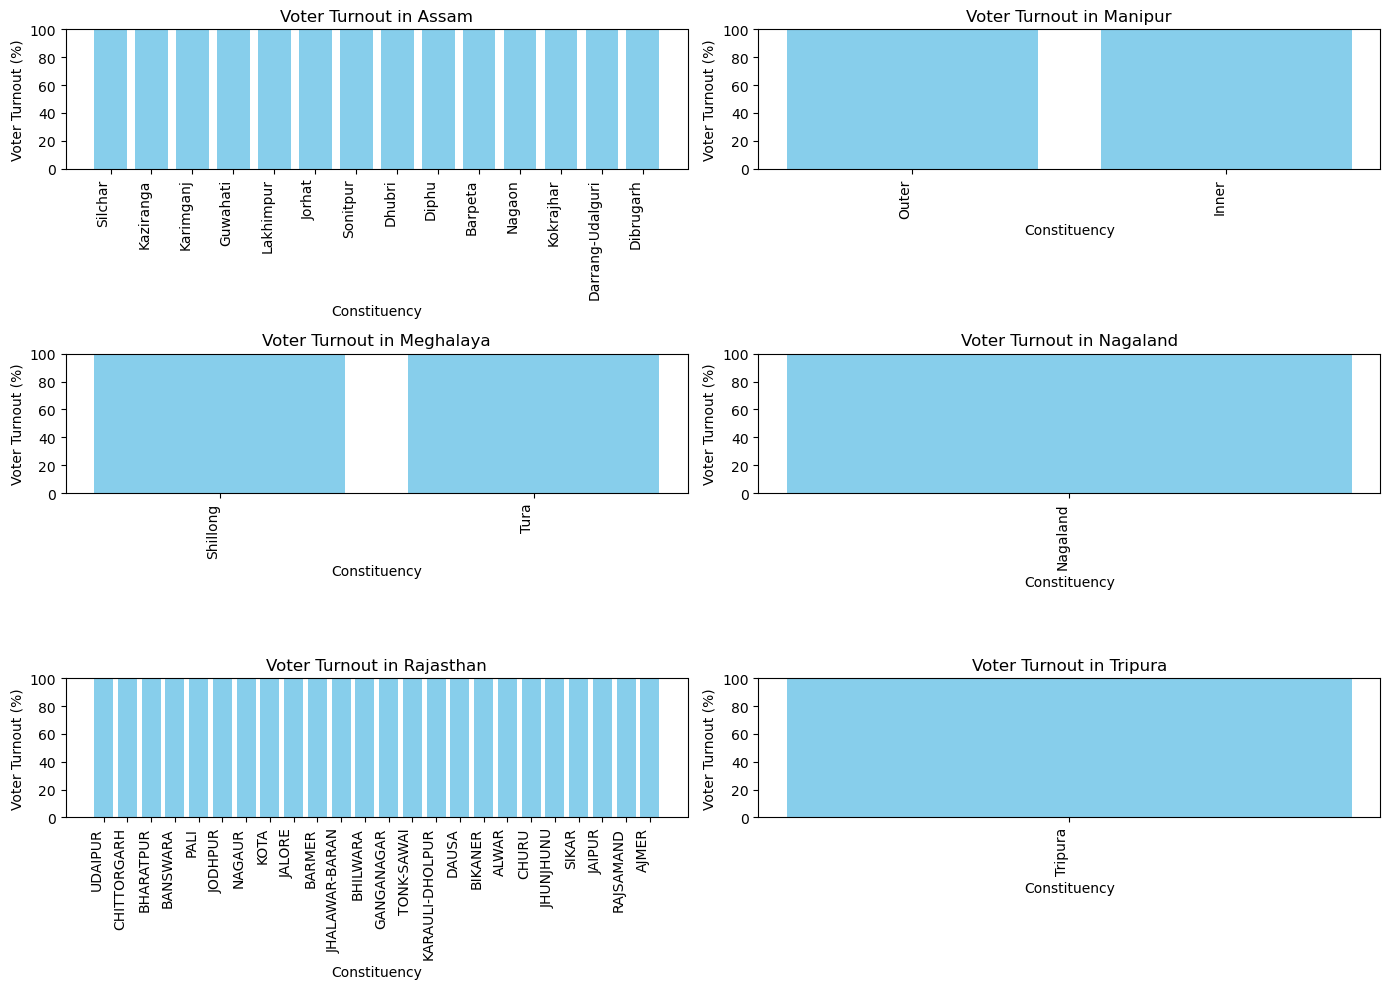

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Clean the Total Votes column by replacing non-numeric values with NaN
df['Total Votes'] = pd.to_numeric(df['Total Votes'].str.replace(',', ''), errors='coerce')

# Check if 'Electors' column exists in the dataset
if 'Electors' in df.columns:
    df['Electors'] = pd.to_numeric(df['Electors'].str.replace(',', ''), errors='coerce')
    # Calculate the voter turnout percentage for each constituency
    df['Voter Turnout (%)'] = (df['Total Votes'] / df['Electors']) * 100
else:
    # If 'Electors' column is not present, calculate turnout based on other available data or handle as appropriate
    df['Voter Turnout (%)'] = df['Total Votes']  # Example fallback, adjust as per your data structure

# Calculate the average voter turnout percentage for each state
avg_turnout_by_state = df.groupby('state')['Voter Turnout (%)'].mean().sort_values(ascending=False)

# Get the top 6 states with the highest voter turnout percentages
top_6_states = avg_turnout_by_state.head(6)

# Plotting the average voter turnout percentages for the top 6 states
plt.figure(figsize=(10, 6))
top_6_states.plot(kind='bar', color='skyblue')
plt.title('Top 6 States by Average Voter Turnout Percentage')
plt.xlabel('State')
plt.ylabel('Average Voter Turnout (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Plotting voter turnout percentages for constituencies in the top 6 states
plt.figure(figsize=(14, 10))
for i, (state, state_data) in enumerate(df[df['state'].isin(top_6_states.index)].groupby('state')):
    plt.subplot(3, 2, i + 1)
    plt.bar(state_data['constituency_name'], state_data['Voter Turnout (%)'], color='skyblue')
    plt.title(f'Voter Turnout in {state}')
    plt.xlabel('Constituency')
    plt.ylabel('Voter Turnout (%)')
    plt.xticks(rotation=90, ha='right')
    plt.ylim(0, 100)
    plt.tight_layout()

plt.tight_layout()
plt.show()


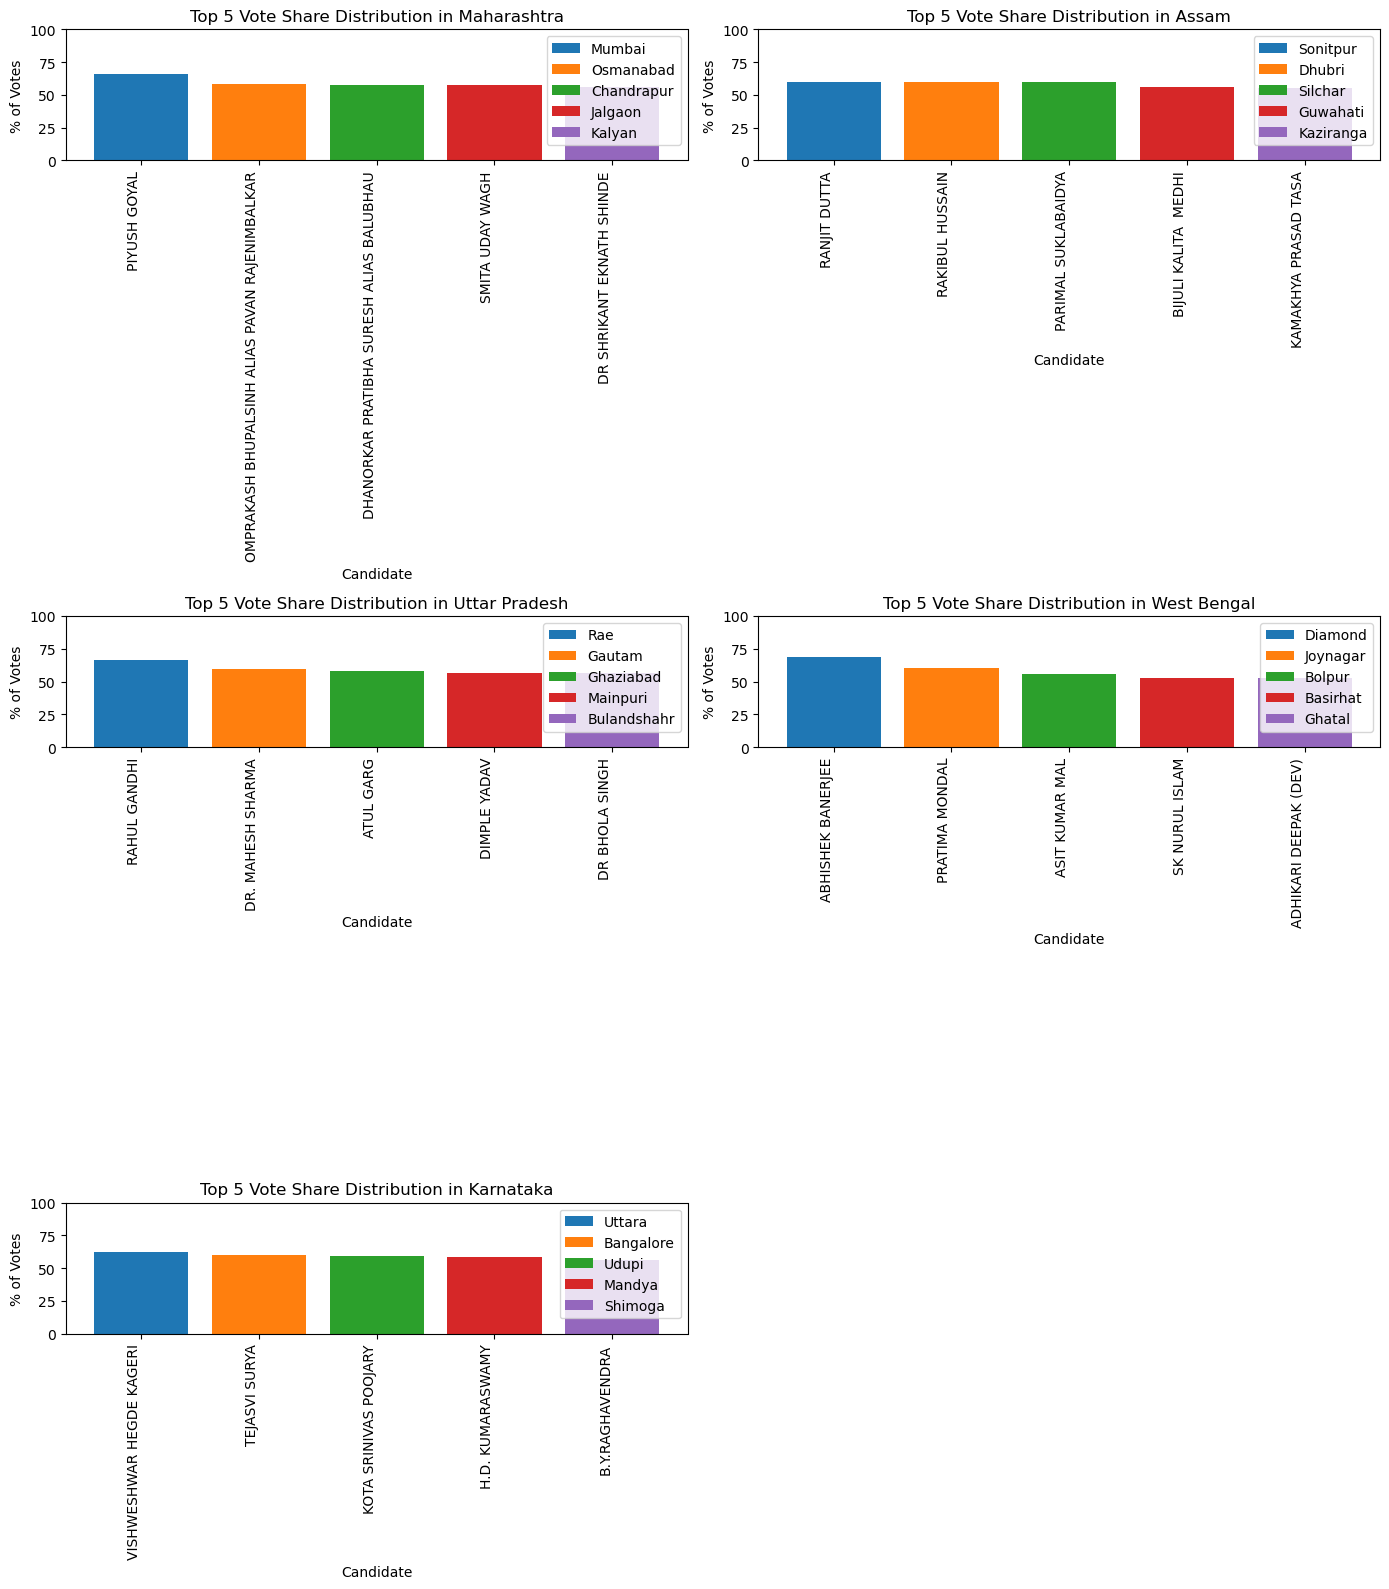

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Clean the % of Votes column by replacing non-numeric values with NaN
df['% of Votes'] = pd.to_numeric(df['% of Votes'].str.replace('%', ''), errors='coerce')

# Select up to 5 states
selected_states = df['state'].unique()[:5]

# Plotting
plt.figure(figsize=(14, 16))  # Adjust figure size for better readability

# Iterate over each selected state
for i, state in enumerate(selected_states):
    # Filter data for the current state
    state_data = df[df['state'] == state]
    
    # Select top 5 constituencies based on % of Votes
    top_constituencies = state_data.sort_values(by='% of Votes', ascending=False).head(5)
    
    plt.subplot(3, 2, i + 1)  # Adjust the subplot layout accordingly
    
    # Plot bar chart for each constituency in the current state
    for index, row in top_constituencies.iterrows():
        plt.bar(row['Candidate'], row['% of Votes'], label=row['constituency_name'])
    
    plt.title(f'Top 5 Vote Share Distribution in {state}')
    plt.xlabel('Candidate')
    plt.ylabel('% of Votes')
    plt.xticks(rotation=90, ha='right')
    plt.legend(loc='upper right')
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()


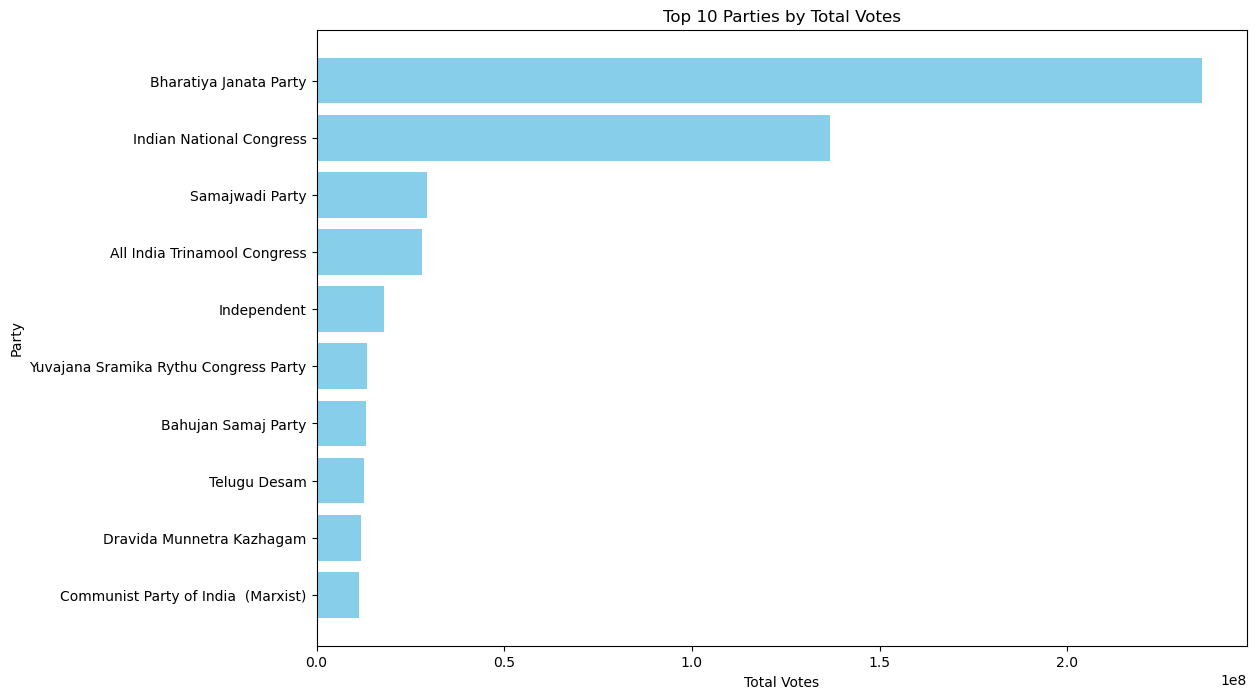

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'E:\Downloads\loksava2024.csv'
data = pd.read_csv(file_path)

# Convert the 'Total Votes' column to numeric, handling non-numeric values
data['Total Votes'] = pd.to_numeric(data['Total Votes'].str.replace(',', '').replace('-', '0'), errors='coerce')

# Aggregate total votes by party
party_votes = data.groupby('Party')['Total Votes'].sum().reset_index()

# Sort the parties by total votes in descending order and select the top 10
top_10_parties = party_votes.sort_values(by='Total Votes', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_10_parties['Party'], top_10_parties['Total Votes'], color='skyblue')
plt.xlabel('Total Votes')
plt.ylabel('Party')
plt.title('Top 10 Parties by Total Votes')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest votes at the top
plt.show()


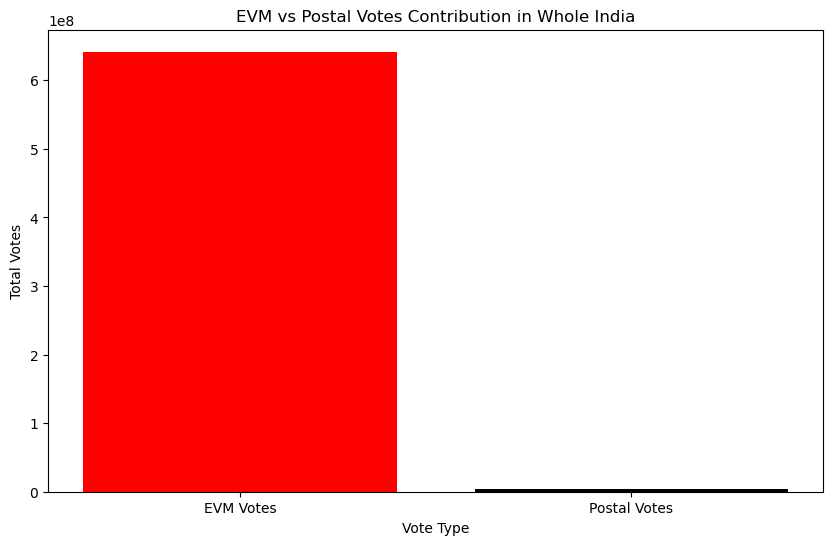

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'E:\Downloads\loksava2024.csv'
df = pd.read_csv(file_path)

# Convert 'EVM Votes' and 'Postal Votes' to numeric
df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')

# Aggregate the total EVM and Postal votes
total_evms = df['EVM Votes'].sum()
total_postals = df['Postal Votes'].sum()

# Prepare data for plotting
votes = {'EVM Votes': total_evms, 'Postal Votes': total_postals}
vote_types = list(votes.keys())
vote_counts = list(votes.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(vote_types, vote_counts, color=['red', 'black'])
plt.title('EVM vs Postal Votes Contribution in Whole India')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()